In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 10 09:39:50 2018

@author: Cerx
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
def tripoint(p1,p2):#works
    p = (2*p1 + p2)/3
    return p

def sharp(p1, p2, mid, h):#works
    if (p1[1]-p2[1]) != 0:
        inv_m = -(p1[0]-p2[0])/(p1[1]-p2[1])
    elif (p1[1]-p2[1]) == 0:
        if p1[0]>p2[0]:
            mid[1] -= h
        else:
            mid[1] += h
        edge = mid
        return edge
    x_add = np.sqrt((h**2)/(inv_m**2 + 1))
    y_add = np.sqrt((inv_m**2 * h**2)/(inv_m**2 + 1))
    
    if p1[0]<p2[0]:
        y_add *= 1
    elif p1[0]>p2[0]:
        y_add *= -1
    if p1[1]<p2[1]:
        x_add *= -1
    elif p1[1]>p2[1]:
        x_add *= 1

    x = mid[0] + x_add
    y = mid[1] + y_add
    return np.array([x,y])

def edge_maker(p1,p2):#look at sharp
    x1 = tripoint(p1,p2)
    x2 = tripoint(p2,p1)
    mid = (p1 + p2)/2
    vector_d = (x1 - x2)
    d = np.sqrt(vector_d[0]**2 + vector_d[1]**2)
    d *= np.sqrt(3)/2
    edge = sharp(p1,p2,mid,d)
    return x1, edge, x2

def koch(point_list, iteration):
    if iteration == 0:
        snowflake = Polygon(point_list, color = 'orange', fill = None)
        fig
        ax.add_patch(snowflake)
        plt.autoscale(enable = True)
    else:
        temp_points = []
        now = 0
        for current_point in point_list:
            then = now + 1
            if then >= len(point_list):
                then = 0
            next_point = point_list[then]
            new1, new2, new3 = edge_maker(current_point,next_point)
            temp_points.append(current_point)
            temp_points.append(new1)
            temp_points.append(new2)
            temp_points.append(new3)
            temp_points.append(next_point)
            now += 1
        koch(temp_points, iteration - 1)

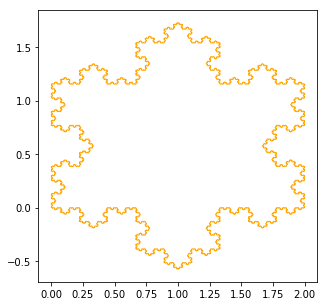

In [4]:
#Create 3 points and draw as triangle
#triangle
p1 = np.array([0,0])
p2 = np.array([1,np.sqrt(3)])
p3 = np.array([2,0])
#parallelogram
#p1 = np.array([0,0])
#p2 = np.array([1,2])
#p3 = np.array([3,2])
#p4 = np.array([2,0])

fig = plt.figure('Koch Snowflake')
ax = plt.axes()
fig.set_size_inches(5,5)
#ax.set_xlim([-5,5])
#ax.set_ylim([-5,5])

point_list = [p1,p2,p3]
#draw = Polygon(point_list, color = 'pink', fill = None)
#ax.add_patch(draw)

koch(point_list,5)
